In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 1
from stack_nlp import *
from jupyter_mplsettings import *
matplotlib.rc('font', **font)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [3]:
cfg = local_import("./default.py")

In [4]:
PrepareData(cfg)

Shape of question df (1696819, 21)
Shape of answer df (2028240, 21)
Loading word dictionary...
Shape of dictionary (3048821, 4)
Warning! Dropping some words from word list, please verify!
Dropping 1211
Calculating normalized columns. They are available under usual column name + _norm.


In [5]:
data = cfg.data

In [6]:
data.keys()

['meta', 'dict', 'features', 'answers']

In [7]:
qs = data["meta"];

In [8]:
qs.head()
print qs.shape

(1339152, 50)


In [11]:
# do sanity check
# qs.iloc[10]

/usr/lib/python2.7/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/usr/lib/python2.7/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


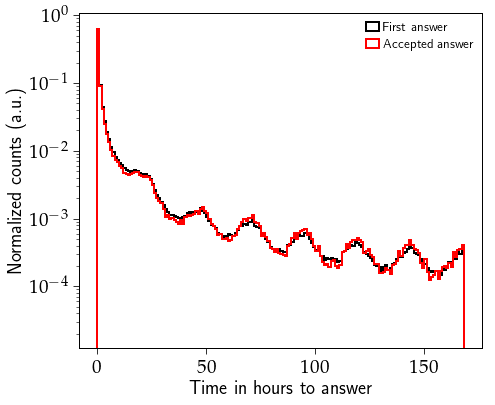

In [12]:
plt.figure(figsize=(8, 6))
plt.xlabel(r"Time in hours to answer")
plt.ylabel(r"Normalized counts (a.u.)")
plt.hist(qs.dt_answer_hour, range=[0, 7 * 24], bins=7 * 24, 
         histtype="step", lw=2, color="k", label="First answer", normed=True, log=True);
plt.hist(qs.dt_accanswer_hour, range=[0, 7 * 24], bins=7 * 24,
        histtype="step", lw=2, color="r", label="Accepted answer", normed=True, log=True);
# plt.semilogy(nonposy="clip")
plt.legend(loc="upper right")
plt.savefig("./plots/dthist_first_accepted_normed.pdf")

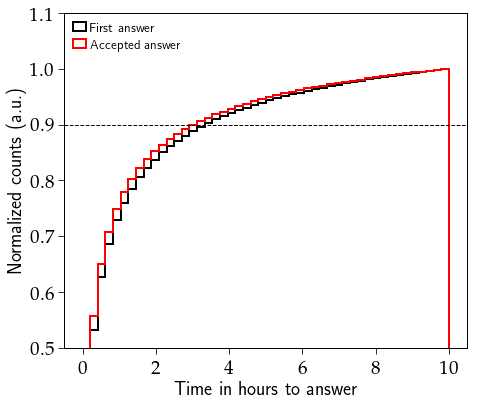

In [15]:
plt.figure(figsize=(8, 6))
plt.xlabel(r"Time in hours to answer")
plt.ylabel(r"Normalized counts (a.u.)")
plt.hist(qs.dt_answer_hour, range=[0, 10], bins=48, cumulative=True,
         histtype="step", lw=2, color="k", label="First answer", normed=True, log=False);
plt.hist(qs.dt_accanswer_hour, range=[0, 10], bins=48, cumulative=True,
        histtype="step", lw=2, color="r", label="Accepted answer", normed=True, log=False);
# plt.semilogy(nonposy="clip")
plt.axhline(0.9, lw=1, ls="--", color="black")
plt.ylim(0.5, 1.05)
plt.legend(loc="upper left")
plt.savefig("./plots/dthist_first_accepted_normed_cum.pdf")

In [27]:
# testing plotly library
data = [go.Histogram(x=qs.dt_accanswer_hour, xbins=dict(start=0, end=10, size=0.2),
                     cumulative=dict(enabled=True), histnorm="percent")]

# plotly.offline.iplot(data, filename='cumulative histogram')

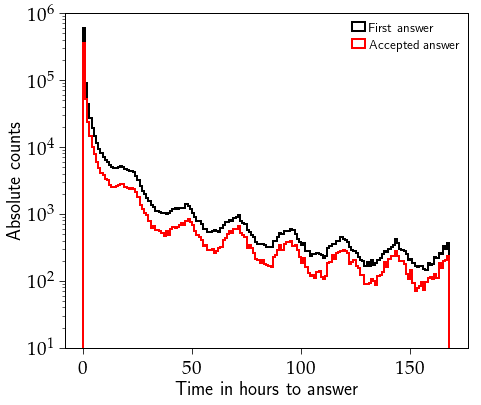

In [28]:
plt.figure(figsize=(8, 6))
plt.xlabel(r"Time in hours to answer")
plt.ylabel(r"Absolute counts")
plt.hist(qs.dt_answer_hour, range=[0, 7 * 24], bins=7 * 24, 
         histtype="step", lw=2, color="k", label="First answer", log=True);
plt.hist(qs.dt_accanswer_hour, range=[0, 7 * 24], bins=7 * 24,
        histtype="step", lw=2, color="r", label="Accepted answer", log=True);
# plt.semilogy(nonposy="clip")
plt.ylim(10, 10 ** 6)
plt.legend(loc="upper right")
plt.savefig("./plots/dthist_first_accepted.pdf")

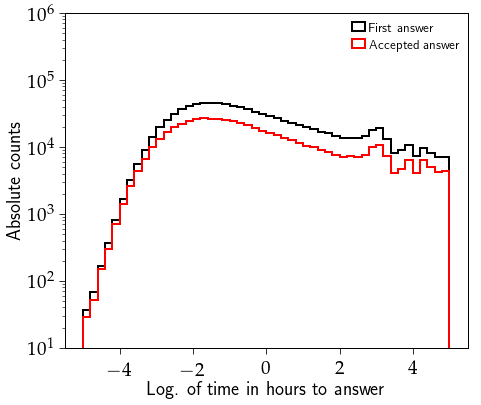

In [29]:
plt.figure(figsize=(8, 6))
plt.xlabel(r"Log. of time in hours to answer")
plt.ylabel(r"Absolute counts")
plt.hist(qs.dt_answer_hour.apply(np.log), bins=50, 
         histtype="step", lw=2, color="k", range=[-5, 5], label="First answer", log=True);
plt.hist(qs.dt_accanswer_hour.apply(np.log), bins=50,
        histtype="step", lw=2, color="r", range=[-5, 5], label="Accepted answer", log=True);
# plt.semilogy(nonposy="clip")
plt.ylim(10, 10 ** 6)
plt.legend(loc="upper right")
plt.savefig("./plots/dthist_log_first_accepted.pdf")

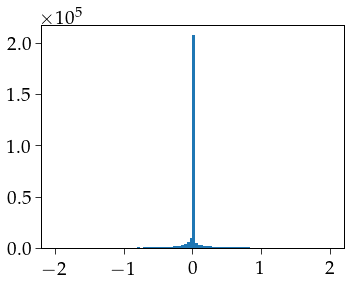

In [14]:
plt.hist(qs.dt_accanswer_hour - qs.dt_answer_hour, range=[-2, 2], bins=100);
# plt.semilogy(nonposy="clip")

In [30]:
print np.sum(~qs.dt_answer.isnull())
print np.sum(~qs.dt_accanswer.isnull())

1052832
597949


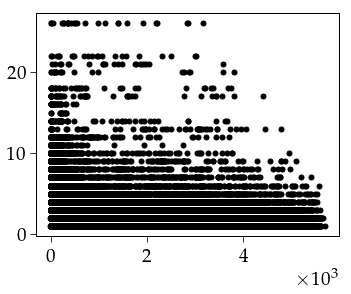

In [31]:
plt.plot(qs.dt_answer_hour, qs.AnswerCount, "k.")

In [9]:
qs.columns

Index([u'AcceptedAnswerId', u'AnswerCount', u'BodyNCodes', u'BodyNQMarks',
       u'BodySize', u'ClosedDate', u'CommentCount', u'CommunityOwnedDate',
       u'CreationDate', u'FavoriteCount', u'Id', u'LastActivityDate',
       u'LastEditDate', u'LastEditorUserId', u'OwnerUserId', u'ParentId',
       u'PostTypeId', u'Score', u'Tags', u'Title', u'ViewCount', u'titlelen',
       u'hasAnswers', u'dt_created', u'Id_r', u'hot_indices', u'nwords',
       u'ordermean', u'orderstd', u'ordersum', u'prob_bern', u'prob_poiss',
       u'ratio', u'ParentId_first', u'CreationDate_first', u'Id_acc',
       u'CreationDate_acc', u'dayhour', u'weekday', u'dt_answer',
       u'dt_accanswer', u'dt_answer_hour', u'dt_accanswer_hour',
       u'BodyNCodes_norm', u'BodyNQMarks_norm', u'BodySize_norm',
       u'titlelen_norm', u'nwords_norm', u'ordersum_norm', u'ratio_norm'],
      dtype='object')

In [20]:
qs.columns
m = np.isfinite(qs.dt_accanswer_hour)

no = qs.AnswerCount == 0

ndays = 7
# dthours = qs.dt_answer.dt.total_seconds() * 1. / 3600
cols = ["AnswerCount", "BodyNCodes", "BodyNQMarks", "BodySize", 
        "titlelen", "nwords", "ordersum", "ordermean", "orderstd", "ratio", "Score", "prob_bern"]

desc = ["Number of replies", "Number of code tags", "Number of question marks", "Length of post text",
        "Length of title", "Number of meaningful words", "Word prevalence (sum)", "Word prevalence (average)",
        "Word prevalence (std)", "Ratio of number of verbs to nouns", "Question score", "Joined bernoulli probability of words"]

xqbins = mquantiles(qs.dt_accanswer_hour[m], np.linspace(0, 1, 15))

xqbins = xqbins[xqbins < ndays * 24]
if len(xqbins) % 2 == 1:
    xqbins = xqbins[:-1]
    
for i, col in enumerate(cols):
    print "Plotting for column %s..." % col
    quants = mquantiles(qs[m][col], prob=[0.01, 0.1, 0.9, 0.95])
#     print quants
    plt.figure(figsize=(8, 6))
    plt.xlabel(r"Time to accepted answer / hours")
    plt.ylabel(r"%s" % desc[i])
#     plt.plot(dthours, qs[col], "k.")
    QuickSlicePlot(qs.dt_accanswer_hour[m], qs[m][col], qs.dt_accanswer_hour[m], zbins=1, yrange=quants[1:-1], 
#                    xRange=[0, ndays * 24], xbins=2 * ndays, draw="amvs",
                   xbins=xqbins, draw="amvc", outliers=True, ms=6, color="black", textpos=quants[2],
                   axes=plt.gca(), label="Answered questions")
    
    ViolinPlot(np.asfarray([(ndays + 1) * 24]), np.asfarray([qs[no][col]]), xhw=np.asfarray([80]),
               bins=None, draw="amvc", outliers=True, ms=6, color="blue", textpos=quants[2],
               axes=plt.gca(), label="Unanswered questions")
    
    plt.axhline(np.median(qs[m][col]), ls="--", lw=1, color="black")
    plt.xlim(0.006, (ndays + 3) * 24)
    plt.ylim(quants[0], quants[-1])
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
    plt.semilogx()
    plt.legend(loc="upper left")
#     plt.show()
    plt.savefig("./plots/%s_vs_answertime.pdf" % col)
    plt.close()
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
# plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
# plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

Plotting for column AnswerCount...
Warning! Error in estimating kernel density for data in bin 0! Skipping bin...
Plotting for column BodyNCodes...
Plotting for column BodyNQMarks...
Plotting for column BodySize...
Plotting for column titlelen...
Plotting for column nwords...
Plotting for column ordersum...
Plotting for column ordermean...
Plotting for column orderstd...
Plotting for column ratio...
Plotting for column Score...
Plotting for column prob_bern...


In [63]:
qs["dayhour"] = qs.CreationDate.dt.hour
qs["weekday"] = qs.CreationDate.dt.dayofweek
qs["day"] = qs.CreationDate.dt.dayofyear
# training and testing samples
qs = shuffle(qs)
print len(qs)
# limiting to questions with accepted answer for training
qsgood = qs[np.isfinite(qs.dt_accanswer_hour)]
# qsgood = qs[np.isfinite(qs)]
# for training, consider only first weeks for answer time (due to reweighting)
qsgood = qsgood[qsgood.dt_accanswer_hour <= 14 * 24]
qsgood = qsgood[qsgood.dt_accanswer_hour > 0]
print len(qsgood)
train = 200000
qstrain = qsgood.iloc[:train]
qstest = qsgood.iloc[train:]
print len(qstrain)
print len(qstest)

label = "dt_accanswer_hour"

# sample with no answers, aka the ultimate testing sample
qsnone = qs[qs.AnswerCount == 0]
print len(qsnone)

1339152
580378
200000
380378
286296


In [64]:
qstrain.head()

,AcceptedAnswerId,AnswerCount,BodyNCodes,BodyNQMarks,BodySize,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,...,dt_answer_hour,dt_accanswer_hour,BodyNCodes_norm,BodyNQMarks_norm,BodySize_norm,titlelen_norm,nwords_norm,ordersum_norm,ratio_norm,day
1074660,43566400,1,5,1,1028,-1.0,0,-1.0,2017-04-22 23:03:06.681600,-1,...,2.215152,2.215152,0.357143,0.1,0.082999,0.35,0.211679,0.254440,0.262032,112
1085242,43591274,1,3,2,3487,-1.0,0,-1.0,2017-04-24 11:35:35.347200,-1,...,3.210528,3.210528,0.214286,0.2,0.318130,0.15,0.459854,0.407347,0.448529,114
496460,42409001,1,6,1,703,-1.0,1,-1.0,2017-02-23 06:49:07.536000,-1,...,0.152952,0.152952,0.428571,0.1,0.051922,0.30,0.116788,0.057770,0.262032,54
382750,42181806,2,3,2,1045,-1.0,3,-1.0,2017-02-11 21:59:36.960000,-1,...,0.045552,0.162768,0.214286,0.2,0.084624,0.69,0.255474,0.294313,0.336471,42
223251,41860495,4,2,2,3391,-1.0,5,-1.0,2017-01-25 19:46:38.524800,-1,...,0.195768,0.146664,0.142857,0.2,0.308950,0.19,0.124088,0.025063,0.352941,25


In [ ]:
# we probably want to reweight events according to the steeply falling time distribution...
#max(qstrain.dt_accanswer_hour)
# counts, edges = np.histogram(qstrain.dt_accanswer_hour, mquantiles(qstrain.dt_accanswer_hour, prob=np.linspace(0., 1., 100)))
from pyik.numpyext import centers

counts, edges = np.histogram(np.log(qstrain.dt_accanswer_hour), bins=300)
cens = centers(edges)[0]
counts = counts * 1. / np.sum(counts)
counts;
print edges[:10];
weights = 1. / counts[np.minimum(np.digitize(np.log(qstrain.dt_accanswer_hour.values), edges) - 1, len(counts) - 1)]
print qstrain.dt_accanswer_hour.iloc[:10]
qstrain["weights"] = weights
print qstrain.weights.iloc[:10]

In [65]:
qstrain.columns

Index([u'AcceptedAnswerId', u'AnswerCount', u'BodyNCodes', u'BodyNQMarks',
       u'BodySize', u'ClosedDate', u'CommentCount', u'CommunityOwnedDate',
       u'CreationDate', u'FavoriteCount', u'Id', u'LastActivityDate',
       u'LastEditDate', u'LastEditorUserId', u'OwnerUserId', u'ParentId',
       u'PostTypeId', u'Score', u'Tags', u'Title', u'ViewCount', u'titlelen',
       u'hasAnswers', u'dt_created', u'Id_r', u'hot_indices', u'nwords',
       u'ordermean', u'orderstd', u'ordersum', u'prob_bern', u'prob_poiss',
       u'ratio', u'ParentId_first', u'CreationDate_first', u'Id_acc',
       u'CreationDate_acc', u'dayhour', u'weekday', u'dt_answer',
       u'dt_accanswer', u'dt_answer_hour', u'dt_accanswer_hour',
       u'BodyNCodes_norm', u'BodyNQMarks_norm', u'BodySize_norm',
       u'titlelen_norm', u'nwords_norm', u'ordersum_norm', u'ratio_norm',
       u'day'],
      dtype='object')

In [17]:
import dill
# dill.dump(estimator, open('estimator.dill', 'w'))
# estimator = dill.load(open('estimator.dill', 'r'))

## Fitting random forest to the space of simple features derived from the text

In [66]:
# cols = [col for col in qstrain.columns if "_norm" in col]
# print cols

cols = ["BodyNCodes", "BodyNQMarks", "BodySize", "titlelen", "nwords", "ordersum", "ordermean", "orderstd", "ratio"]

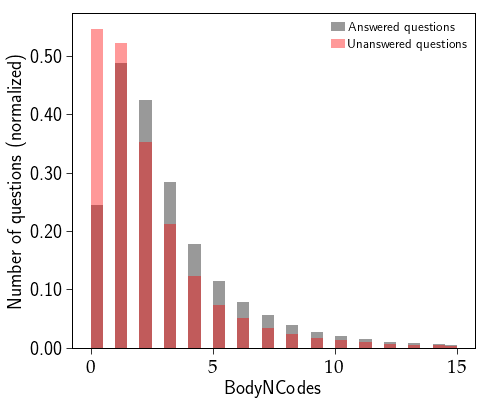

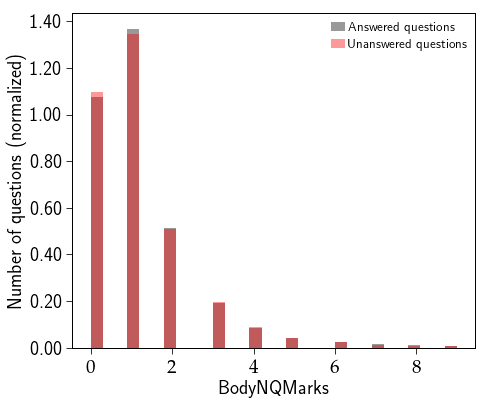

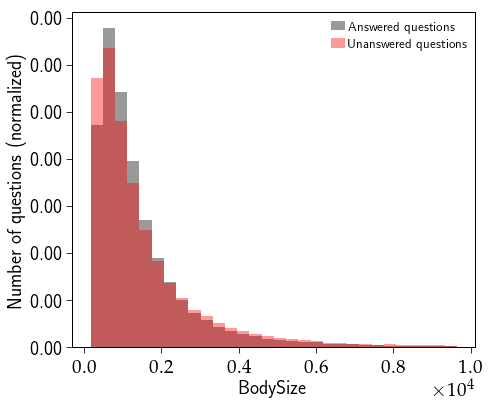

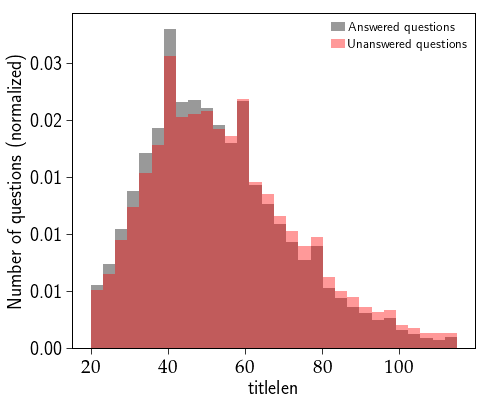

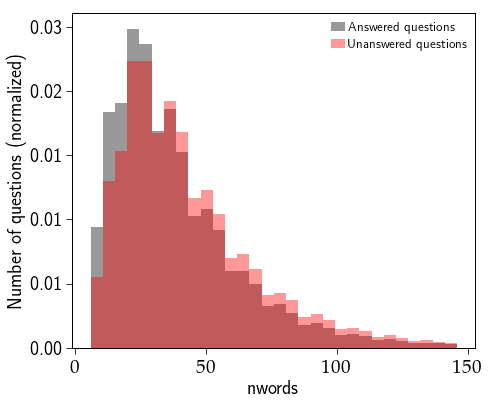

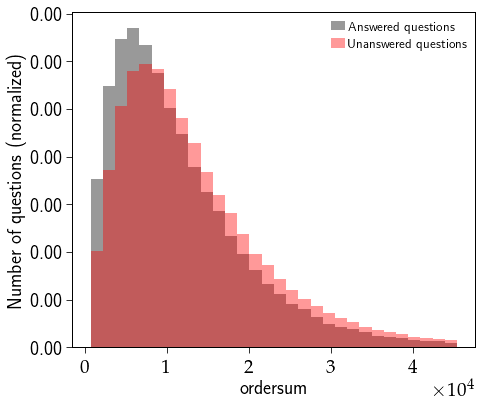

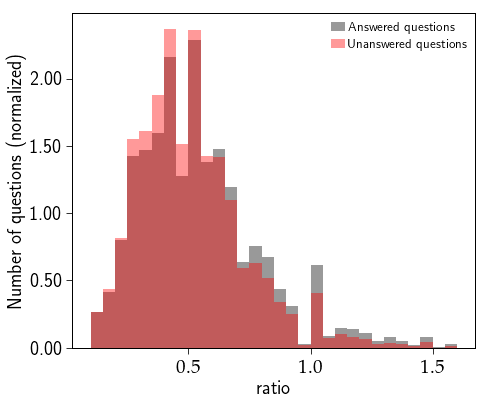

In [71]:
for col in cols:
    cvals = qstrain[col]
    quants = mquantiles(cvals, prob=np.linspace(0.01, 0.99, 30))
    plt.figure(figsize=(8, 6))
    plt.ylabel(r"Number of questions (normalized)")
    plt.xlabel(col.replace("_norm", ""))
    plt.hist(qstrain[col], range=[min(quants), max(quants)], bins=30, 
             color="k", histtype="stepfilled", alpha=0.4, lw=2, 
             label="Answered questions", density=True)
    plt.hist(qsnone[col], range=[min(quants), max(quants)], bins=30, 
             color="r", histtype="stepfilled", alpha=0.4, lw=2, 
             label="Unanswered questions", density=True)
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%.2f"))
    plt.legend(loc="best")
    plt.savefig("./plots/histcomp_%s.pdf" % col.replace("_norm", ""))

In [60]:
qstrain.loc[pd.notnull(qstrain.all(axis=1))].shape

(200000, 51)

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

# cols = ["BodyNCodes", "BodyNQMarks", "BodySize", "titlelen", "nwords", "ordersum", "ordermean", "orderstd", "ratio"]
cols = ["BodyNCodes", "BodyNQMarks", "BodySize", "titlelen", "nwords", "ordersum"]

pipe_feat_fct = lambda a: Pipeline([
         ("cst", ColumnSelectTransformer(cols + ["weekday", "dayhour", "day"])),
         ("scale", StandardScaler()),
         ("poly", PolynomialFeatures(degree=1)),
#          ("ridge", Ridge(alpha=a, normalize=True))
#          ("multi", MultiModelRegressor(Ridge(alpha=a, normalize=True), RandomForestRegressor(n_estimators=20)))
         ("multi", MultiModelRegressor(SGDRegressor(), RandomForestRegressor(n_estimators=20)))
#          ("ranforest", RandomForestRegressor(n_estimators=15))
    ])

pipe_feat = pipe_feat_fct(2)

In [ ]:
cv = model_selection.ShuffleSplit(n_splits=20, test_size=0.2, random_state=42)
def compute_error(est, X, y):
    return -model_selection.cross_val_score(est, X, y, cv=cv, scoring='neg_mean_squared_error').mean()

for alpha in np.linspace(0.1, 10, 20):
    pipe = pipe_feat_fct(alpha)
    pipe.fit(qstrain, np.log(qstrain[label]))
    print alpha, compute_error(pipe, qstrain, np.log(qstrain[label]))

In [ ]:
np.log(qstrain[label]).hist()
qstrain.dt_accanswer_hour.apply(np.log).hist()
# qs.dt_accanswer_hour.apply(np.log).hist()

In [92]:
# weighted ridge regression
# pipe_feat.fit(qstrain, np.log(qstrain[label]), **{"multi__sample_weight": qstrain.weights})
# unweighted
pipe_feat.fit(qstrain, np.log(qstrain[label]))
pred = pipe_feat.predict(qstest)
print np.column_stack((pred, np.log(qstest[label])))
print pipe_feat.score(qstest, np.log(qstest[label]))
# print pipe_feat.score(qstest, np.log(qstest[label]), sample_weight=qstest.weights)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [103]:
pipe_tags = Pipeline([
                     ("cst", ColumnSelectTransformer(["Tags"])),
                     ("dec", DictEncoder("Tags")),
                     ("dvec", DictVectorizer(sparse=True)),
                     ("tfid", TfidfTransformer()),
                     # ("poly", PolynomialFeatures(degree=2)),  # not working???
#                      ("ridge", Ridge(alpha=2.0))
                     ("multi", MultiModelRegressor(Ridge(alpha=2, normalize=True), RandomForestRegressor(n_estimators=15)))
                     # ("kridge", KernelRidge(alpha=1.))  # runs out of memory quickly while fitting...
                     # ("svr", SVR())
                     ])

In [104]:
pipe_tags.fit(qstrain, np.log(qstrain[label]))
pred = pipe_tags.predict(qstest)
print np.column_stack((pred, np.log(qstest[label])))
print pipe_tags.score(qstest, np.log(qstest[label]))

Performing base regression...
Performing residual regression...
[[-1.59897672 -1.24080278]
 [ 1.7261293   2.53918837]
 [-1.7074145  -2.46557472]
 ..., 
 [-1.01271468 -2.54889492]
 [-1.69897824 -1.11581542]
 [ 3.52367906  3.57332448]]
0.208416314159


In [18]:
pipe_words = Pipeline([
                      ("cst", ColumnSelectTransformer(["hot_indices"])),
                      ("dec", DictEncoder("hot_indices")),
                      ("dvec", DictVectorizer(sparse=True)),
                      ("tfid", TfidfTransformer()),
#                       ("ridge", Ridge(alpha=2.0))
#                       ("multi", MultiModelRegressor(Ridge(alpha=a, normalize=True), RandomForestRegressor(n_estimators=15)))
#                       ("multi", MultiModelRegressor(Ridge(alpha=2, normalize=True), MLPRegressor(hidden_layer_sizes=(50, 50))))
                      ("mlp", MLPRegressor(hidden_layer_sizes=(100, 100)))
                      ])

In [19]:
pipe_words.fit(qstrain, np.log(qstrain[label]))
pred = pipe_words.predict(qstest)
print np.column_stack((pred, np.log(qstest[label])))
print pipe_words.score(qstest, np.log(qstest[label]))

[[ 0.11661578  1.73275229]
 [-0.68789848  1.62309463]
 [-0.41625747  0.56544562]
 ..., 
 [-0.95755484 -2.74837232]
 [-0.66469107 -2.45769623]
 [-0.03610053 -1.2427968 ]]
0.0427342687598


In [90]:
from sklearn.pipeline import FeatureUnion
union = FeatureUnion([
                     ("tags", EstimatorTransformer(pipe_tags)),
                     ("words", EstimatorTransformer(pipe_words)),
                     ("feat", EstimatorTransformer(pipe_feat))
                     ])

pipe_combined = Pipeline([
                    ("union", union),
                    ("ridge", Ridge(alpha=3.0))
                    # ("comb", CustomCombiner())
                    ])

In [92]:
pipe_combined.fit(qstrain, np.log(qstrain[label]))
pred = pipe_combined.predict(qstest)
print np.column_stack((pred, np.log(qstest[label])))
print pipe_combined.score(qstest, np.log(qstest[label]))

Performing base regression...
Performing residual regression...
Performing base regression...
Performing residual regression...
[[-1.38131283 -1.24080278]
 [ 2.58146676  2.53918837]
 [-1.48334503 -2.46557472]
 ..., 
 [-0.68950884 -2.54889492]
 [ 0.51332501 -1.11581542]
 [ 1.50734924  3.57332448]]
0.461645944995


In [93]:
import dill

In [94]:
dill.dump(pipe_combined, open("pipe_feat.dill", "w"))

In [ ]:
pipe_feat = dill.load(open('pipe_feat.dill', 'r'))

## Investigating difference (residuals) in test sample vs. various dimensions

In [1]:
predtimes = np.e ** pred
cols = [col.replace("_norm", "") for col in qstrain.columns if "_norm" in col]
diff = qstest[label] - predtimes

for i, col in enumerate(cols):
    yquants = mquantiles(diff, prob=[0.05, 0.95])
    xquants = mquantiles(qstest[col], prob=np.linspace(0.01, 0.99, 20))
    plt.figure(i, figsize=(8, 6))
    plt.xlabel("%s" % col)
    plt.ylabel(r"Answer time: reality - prediction in hours")
    QuickSlicePlot(qstest[col], diff, qstest.dt_accanswer_hour, zbins=1, yrange=yquants, 
                   xbins=xquants, draw="amv", color="red", ms=6,
                   axes=plt.gca())
    plt.axhline(0, lw=1, ls="--", color="k")
    plt.ylim(-100, 100)
    plt.xlim(min(xquants), max(xquants))
    plt.savefig("./plots/residual_vs_%s.pdf" % col)

NameError: name 'pred' is not defined

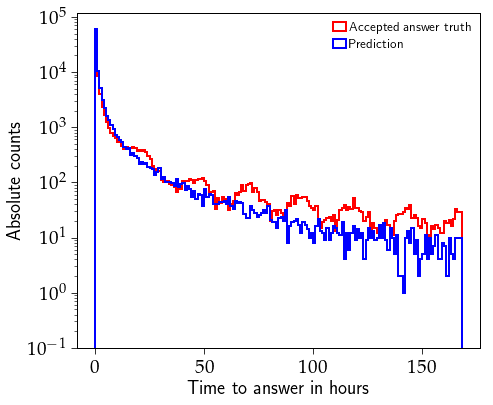

In [106]:
plt.figure(figsize=(8, 6))
plt.xlabel(r"Time to answer in hours")
plt.ylabel(r"Absolute counts")
plt.hist(qstest.dt_answer_hour, range=[0, 7 * 24], bins=7 * 24, 
         histtype="step", lw=2, color="r", label="Accepted answer truth", log=True);
plt.hist(predtimes, range=[0, 7 * 24], bins=7 * 24,
        histtype="step", ls="-", lw=2, color="b", label="Prediction", log=True);
# plt.semilogy(nonposy="clip")
plt.legend(loc="upper right")
plt.savefig("./plots/dthist_predictions.pdf")

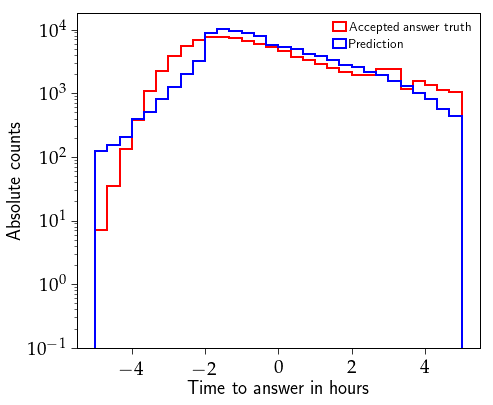

In [107]:
plt.figure(figsize=(8, 6))
plt.xlabel(r"Time to answer in hours")
plt.ylabel(r"Absolute counts")
plt.hist(qstest.dt_answer_hour.apply(np.log), range=[-5, 5], bins=30,
         histtype="step", lw=2, color="r", label="Accepted answer truth", log=True);
plt.hist(np.log(predtimes), range=[-5, 5], bins=30,
         histtype="step", ls="-", lw=2, color="b", label="Prediction", log=True);
# plt.semilogy(nonposy="clip")
plt.legend(loc="upper right")
plt.savefig("./plots/dthist_log_predictions.pdf")

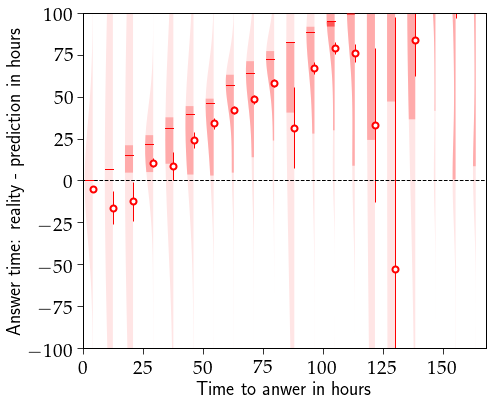

In [109]:
plt.figure(figsize=(8, 6))
plt.xlabel(r"Time to anwer in hours")
plt.ylabel(r"Answer time: reality - prediction in hours")
QuickSlicePlot(qstest.dt_answer_hour, diff, qstest.dt_accanswer_hour, zbins=1, yrange=[-50, 50], 
               xRange=[0, 7 * 24], xbins=20, draw="amv", color="red", ms=6,
               axes=plt.gca())
plt.axhline(0, lw=1, ls="--", color="k")
plt.ylim(-100, 100)
plt.xlim(0, 7 * 24)
plt.savefig("./plots/dtresidual_vs_dt.pdf")

## effect of the number of questions per time (more questions -> more answer delay?)

In [58]:
# number of 
date_edges = pd.date_range(qstrain.CreationDate.min(), qstrain.CreationDate.max(), freq="H")
# print date_edges
date_centers = date_edges[:-1] + (date_edges[1:] - date_edges[:-1]) / 2
date_centers = date_centers.to_pydatetime()
# print date_centers
allcounts = pd.cut(qstrain.CreationDate, bins=date_edges).value_counts().values[::-1]

In [62]:
allcounts.shape
date_edges.shape

(1716,)

In [ ]:
qstrain

In [88]:
print qstrain.shape
# doing it with groupby...more elegant
qrate = qstrain.groupby([qstrain.CreationDate.dt.year, qstrain.CreationDate.dt.month, 
                         qstrain.CreationDate.dt.day, qstrain.CreationDate.dt.hour]).size()

(200000, 46)


In [90]:
qstrainmulti = qstrain.set_index([qstrain.CreationDate.dt.year, qstrain.CreationDate.dt.month, 
                                  qstrain.CreationDate.dt.day, qstrain.CreationDate.dt.hour])
qstrainmulti["qrate"] = qrate
qstrain = qstrainmulti.reset_index(drop=True)
print qstrain.shape

(200000, 47)


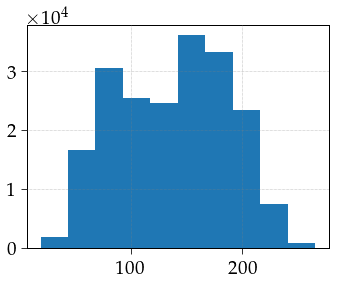

In [96]:
qstrain.qrate.hist()

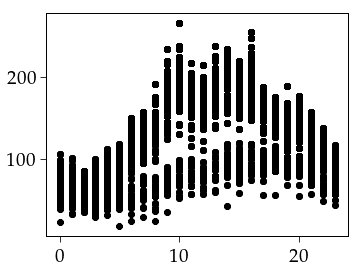

In [98]:
plt.plot(qstrain.CreationDate.dt.hour, qstrain.qrate, "k.")

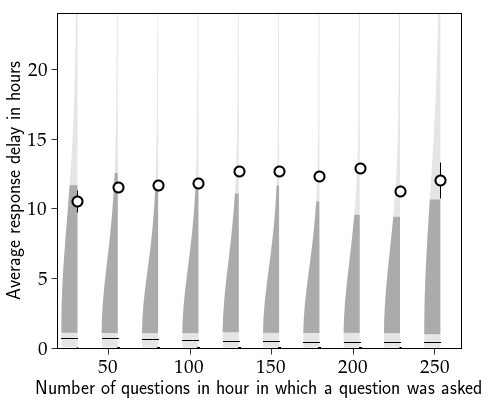

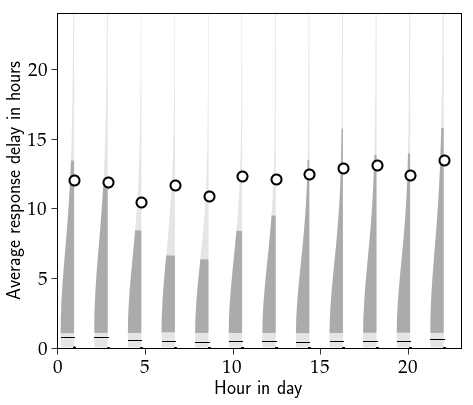

In [99]:
# dependence of average answer delay with the rate of questions in the same hour of asking a particular question
plt.figure(figsize=(8, 6))
plt.xlabel("Number of questions in hour in which a question was asked")
plt.ylabel("Average response delay in hours")
QuickSlicePlot(qstrain.qrate, qstrain.dt_accanswer_hour, qstrain.Score, zbins=1, xbins=10,
              yrange=[0, 24], draw="amv", axes=plt.gca())
plt.show()

# dependence of average answer delay with the rate of questions in the same hour of asking a particular question
plt.figure(figsize=(8, 6))
plt.xlabel("Hour in day")
plt.ylabel("Average response delay in hours")
QuickSlicePlot(qstrain.CreationDate.dt.hour, qstrain.dt_accanswer_hour, qstrain.Score, zbins=1, xbins=12,
              yrange=[0, 24], draw="amv", axes=plt.gca())
plt.show()